# Diving deeper into the analysis and API

This notebook is meant to give a quick introduction into the main features and workflows of [pyaerocom](http://aerocom.met.no/pyaerocom/). 

This includes brief introductions into the following features:

| What?      | Relevant classes and/or methods |
| :----------- | :----------- |
| Finding model and observation data      | [`pya.browse_database`](https://pyaerocom.met.no/api.html#pyaerocom.io.utils.browse_database) |
| Reading of ***gridded*** model data     | [`pya.io.ReadGridded`](https://pyaerocom.met.no/api.html#pyaerocom.io.readgridded.ReadGridded) |
| Working with ***gridded*** data      | [`pya.GriddedData`](https://pyaerocom.met.no/api.html#pyaerocom.griddeddata.GriddedData) |
| Reading of ***ungridded*** observation data      | [`pya.io.ReadUngridded`](https://pyaerocom.met.no/api.html#reading-of-ungridded-data) |
| Working with ***ungridded*** data     | [`pya.UngriddedData`](https://pyaerocom.met.no/api.html#pyaerocom.ungriddeddata.UngriddedData) |
| Working with data from individual site locations     | [`pya.StationData`](https://pyaerocom.met.no/api.html#pyaerocom.stationdata.StationData) |
| **Colocation** of model and observational data | High-level: [`pya.colocation_auto`](https://pyaerocom.met.no/api.html#module-pyaerocom.colocation_auto) |
|                                                | Low-level: [`pya.colocation`](https://pyaerocom.met.no/api.html#module-pyaerocom.colocation) |
| Working with **colocated** data | [`pya.ColocatedData`](https://pyaerocom.met.no/api.html#pyaerocom.colocateddata.ColocatedData) |

In a graphical way it introduces the main data object and processing routines for model and observation comparisons with pyaerocom, illustrated in the following flowchart:

![Basic processing flowchart of pyaerocom](suppl/pyaerocom_basic_flowchart.png)

Only that in this example "Data server" is the local computer that has the minimal testdataset as an example dataset.

In [1]:
import pyaerocom as pya
pya.__version__

'0.10.0rc2'

Should be at least 0.10.X

#### Check access to testdata

**NOTE**: details regarding testdata access and intialization are covered in tutorial notebook *getting_started_setup.ipynb*.

In [2]:
from pyaerocom.testdata_access import initialise
initialise()

Adding data search directory /home/jonasg/MyPyaerocom/testdata-minimal/modeldata.
Adding data search directory /home/jonasg/MyPyaerocom/testdata-minimal/obsdata.
Adding data search directory /home/jonasg/MyPyaerocom/testdata-minimal/config.
Adding ungridded dataset AeronetSunV3L2Subset.daily located at /home/jonasg/MyPyaerocom/testdata-minimal/obsdata/AeronetSunV3Lev2.daily/renamed.Reader: <class 'pyaerocom.io.read_aeronet_sunv3.ReadAeronetSunV3'>
Adding ungridded dataset AeronetSDAV3L2Subset.daily located at /home/jonasg/MyPyaerocom/testdata-minimal/obsdata/AeronetSDAV3Lev2.daily/renamed.Reader: <class 'pyaerocom.io.read_aeronet_sdav3.ReadAeronetSdaV3'>
Adding ungridded dataset AeronetInvV3L2Subset.daily located at /home/jonasg/MyPyaerocom/testdata-minimal/obsdata/AeronetInvV3Lev2.daily/renamed.Reader: <class 'pyaerocom.io.read_aeronet_invv3.ReadAeronetInvV3'>
Adding ungridded dataset EBASSubset located at /home/jonasg/MyPyaerocom/testdata-minimal/obsdata/EBASMultiColumn.Reader: <clas

## Model data: Reading of and working with *gridded* data

This section provides an introduction into the following pyaerocom classes and architectures:

- [`pyaerocom.io.ReadGridded`](https://pyaerocom.met.no/api.html#module-pyaerocom.io.readgridded)
- [`pyaerocom.GriddedData`](https://pyaerocom.met.no/api.html#module-pyaerocom.griddeddata)

*you may click the links to see the online documentation of these classes.

#### Pre-remark on the `ReadGridded` class

As you could see in tutorial [*getting_started_setup.ipynb*](https://github.com/metno/pyaerocom-tutorials/blob/master/getting_started_setup.ipynb) the `ReadGridded` class makes extensive use of the AeroCom file naming conventions. So if you have model data that is stored using different conventions (e.g. CMIP6), this class will not be of much help (yet) for filtering the correct files to read. In that case you may locate a model NetCDF file yourself and pass it directly into a GriddedData object on initialisation. 

### Find model data

The testdataset contains data from the TM5 model, which is used in the following. You can use the `browse_database` function of pyaerocom to find model ID's (which can be quite cryptic sometimes) using wildcard pattern search.

In [3]:
pya.browse_database('*TM5*')


Pyaerocom ReadGridded
---------------------
Data ID: TM5-met2010_CTRL-TEST
Data directory: /home/jonasg/MyPyaerocom/testdata-minimal/modeldata/TM5-met2010_CTRL-TEST/renamed
Available experiments: ['AP3']
Available years: [2010]
Available frequencies ['daily' 'monthly']
Available variables: ['abs550aer', 'od550aer']


['TM5-met2010_CTRL-TEST']

### Initiate reader class

In [4]:
model_id = 'TM5-met2010_CTRL-TEST'
reader = pya.io.ReadGridded(model_id)

You can have a look at the individual files and corresponding metadata using the `file_info` attribute:

In [5]:
reader.file_info

,var_name,year,ts_type,vert_code,data_id,name,meteo,experiment,perturbation,is_at_stations,3D,filename
0,abs550aer,2010,daily,Column,TM5-met2010_CTRL-TEST,TM5,met2010,AP3,CTRL2019,False,False,aerocom3_TM5-met2010_AP3-CTRL2019_abs550aer_Co...
3,abs550aer,2010,monthly,Column,TM5-met2010_CTRL-TEST,TM5,met2010,AP3,CTRL2019,False,False,aerocom3_TM5-met2010_AP3-CTRL2019_abs550aer_Co...
1,od550aer,2010,daily,Column,TM5-met2010_CTRL-TEST,TM5,met2010,AP3,CTRL2019,False,False,aerocom3_TM5-met2010_AP3-CTRL2019_od550aer_Col...
2,od550aer,2010,monthly,Column,TM5-met2010_CTRL-TEST,TM5,,AP3,CTRL2016,False,False,aerocom3_TM5_AP3-CTRL2016_od550aer_Column_2010...


You can also filter this attribute based on what you are interested in. E.g.:

In [6]:
reader.filter_files(var_name='od550aer')

,var_name,year,ts_type,vert_code,data_id,name,meteo,experiment,perturbation,is_at_stations,3D,filename
1,od550aer,2010,daily,Column,TM5-met2010_CTRL-TEST,TM5,met2010,AP3,CTRL2019,False,False,aerocom3_TM5-met2010_AP3-CTRL2019_od550aer_Col...
2,od550aer,2010,monthly,Column,TM5-met2010_CTRL-TEST,TM5,,AP3,CTRL2016,False,False,aerocom3_TM5_AP3-CTRL2016_od550aer_Column_2010...


### Read Aerosol optical depth at 550 nm (od550aer)

In [7]:
od550aer = reader.read_var('od550aer')

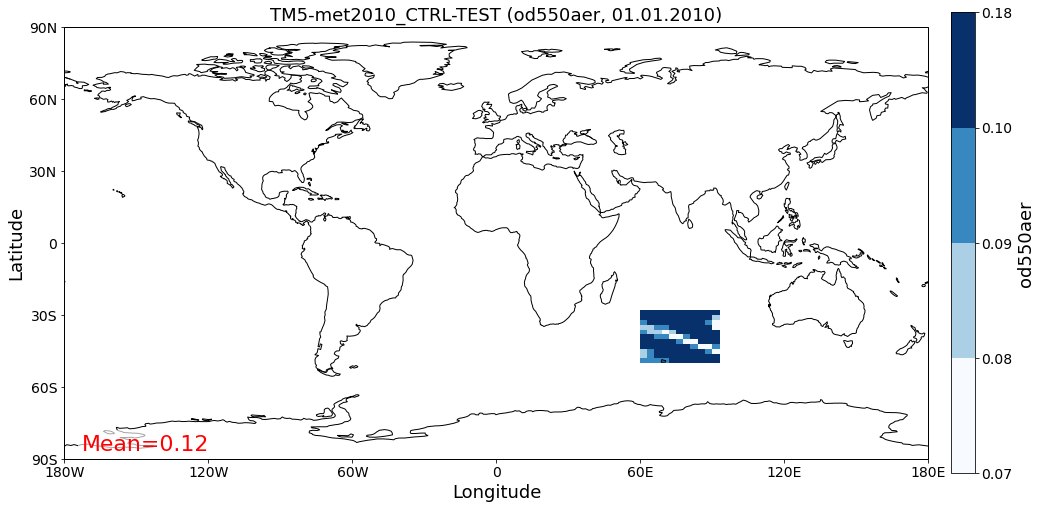

In [8]:
od550aer.quickplot_map();

Ups, this looks rather incomplete. The reason is that pyaerocom picked the available *daily* dataset, which is cropped in the *minimal* testdataset for storage purpose. Let's try monthly.

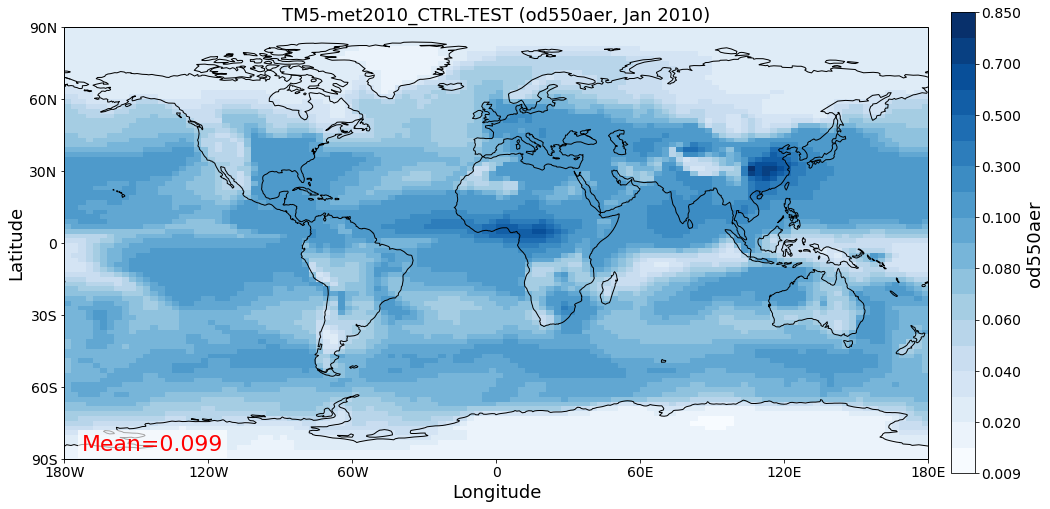

In [9]:
od550aer_tm5 = reader.read_var('od550aer', ts_type='monthly')
od550aer_tm5.quickplot_map();

Looking better. You may wonder why only January is displayed here. This is because `quickplot_map` picks the first available timestamp in the dataset, you may specify that explicitly.

Under the hood [pyaerocom.GriddedData](http://aerocom.met.no/pyaerocom/api.html#module-pyaerocom.griddeddata) is based on the [iris.Cube object](https://scitools.org.uk/iris/docs/v1.9.0/html/iris/iris/cube.html#iris.cube.Cube) class ([iris library](https://scitools.org.uk/iris/docs/v1.9.0/html/index.html)) and features very similar functionality (and more).

The loaded `Cube` instance can be accessed via:

In [10]:
od550aer_tm5.cube

<iris 'Cube' of atmosphere_optical_thickness_due_to_ambient_aerosol / (1) (time: 12; latitude: 90; longitude: 120)>

### Conversion to xarray

If you have not heard of xarray, you should [check it out](http://xarray.pydata.org/en/stable/). If you have heard of it (or maybe even used it already) you may convert a `GriddedData` object to an `xarray.DataArray` via:

In [11]:
xarr = od550aer_tm5.to_xarray()
xarr

<xarray.DataArray 'od550aer' (time: 12, lat: 90, lon: 120)>
dask.array<filled, shape=(12, 90, 120), dtype=float32, chunksize=(12, 90, 61), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2010-01-15 12:00:00 ... 2010-12-15 12:00:00
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 -181.5 -178.5 -175.5 -172.5 ... 169.5 172.5 175.5
Attributes:
    standard_name:     atmosphere_optical_thickness_due_to_ambient_aerosol
    long_name:         Ambient Aerosol Optical Thickness at 550 nm
    institution:       Royal Netherlands Meteorological Institute, De Bilt, T...
    institute_id:      KNMI
    source:            TM5-mp: CTM ERA-Interim 3x2 34L
    model_id:          TM5
    references:        Van Noije, T.P.C., et al. (Geosci. Model Dev., 7, 2435...
    experiment_id:     AP3-CTRL2016
    project_id:        AeroCom Phase 3
    title:             TM5 model output prepared for AeroCom Phase 3
    Conventions:       CF-1.6
    contact:           Twan van Noije (noije@knmi.nl)
    from_files:        ['/home/jonasg/MyPyaerocom/testdata-minimal/modeldata/...
    data_id:           TM5-met2010_CTRL-TEST
    var_name_read:     n/d
    ts_type:           monthly
    regridded:         False
    outliers_removed:  False
    computed:          False
    concatenated:      False
    meteo:             
    experiment:        AP3
    perturbation:      CTRL2016
    cell_methods:      longitude: latitude: point time: mean

### Overview of what is in the data

Simply print the object.

In [12]:
print(od550aer)

pyaerocom.GriddedData: TM5-met2010_CTRL-TEST
Grid data: atmosphere_optical_thickness_due_to_ambient_aerosol / (1) (time: 365; latitude: 11; longitude: 11)
     Dimension coordinates:
          time                                                 x              -              -
          latitude                                             -              x              -
          longitude                                            -              -              x
     Attributes:
          Conventions: CF-1.6
          NCO: 4.7.2
          computed: False
          concatenated: False
          contact: Twan van Noije (noije@knmi.nl)
          data_id: TM5-met2010_CTRL-TEST
          experiment: AP3
          experiment_id: AP3-CTRL2019
          from_files: ['/home/jonasg/MyPyaerocom/testdata-minimal/modeldata/TM5-met2010_CTRL...
          history: Wed Jul  8 10:31:53 2020: ncks -d lat,20,30 -d lon,20,30 raw/aerocom3_TM5-met2010_AP3-CTRL2019_od550aer_Column_2010_daily.nc...
          

### Access dimension coordinates

Dimension coordinates can be simply accessed either using `[]` or `.` operator, e.g.

In [13]:
od550aer['latitude']

DimCoord(array([-49., -47., -45., -43., -41., -39., -37., -35., -33., -31., -29.]), bounds=array([[-50., -48.],
       [-48., -46.],
       [-46., -44.],
       [-44., -42.],
       [-42., -40.],
       [-40., -38.],
       [-38., -36.],
       [-36., -34.],
       [-34., -32.],
       [-32., -30.],
       [-30., -28.]]), standard_name='latitude', units=Unit('degrees'), long_name='Center coordinates for latitudes', var_name='lat')

In [14]:
od550aer.longitude

DimCoord(array([61.5, 64.5, 67.5, 70.5, 73.5, 76.5, 79.5, 82.5, 85.5, 88.5, 91.5]), bounds=array([[60., 63.],
       [63., 66.],
       [66., 69.],
       [69., 72.],
       [72., 75.],
       [75., 78.],
       [78., 81.],
       [81., 84.],
       [84., 87.],
       [87., 90.],
       [90., 93.]]), standard_name='longitude', units=Unit('degrees'), long_name='Center coordinates for longitudes', var_name='lon')

They are instances of `iris.coords.DimCoords`, as defined in the underlying `Cube` instance used in the `GriddedData` object. 

#### Time stamps

Time stamps are represented as numerical values with respect to a reference date and frequency, according to the CF conventions. They can be accessed via the `time` attribute of the data class (if the data contains a time dimension).

In [15]:
od550aer_tm5.time

DimCoord(array([58454.5, 58484. , 58513.5, 58544. , 58574.5, 58605. , 58635.5,
       58666.5, 58697. , 58727.5, 58758. , 58788.5]), standard_name='time', units=Unit('days since 1850-01-01 00:00', calendar='julian'), long_name='Time', var_name='time')

You may also want the time-stamps in the form of actual datetime-like objects. These can be computed using the `time_stamps()` method:

In [16]:
od550aer.time_stamps()[0:3]

array(['2010-01-01T00:00:00.000000', '2010-01-02T00:00:00.000000',
       '2010-01-03T00:00:00.000000'], dtype='datetime64[us]')

### Plotting maps

As introduced above, maps of individual time stamps can be plotted using the quickplot_map method. Above we used the default call, which chooses the first available timestamp. You may also specify which date you are interested in:

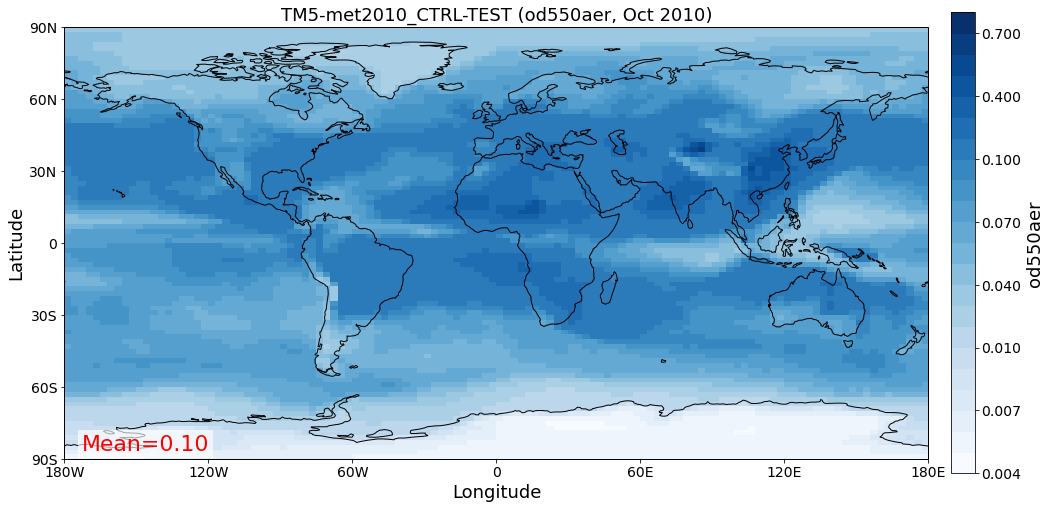

In [17]:
od550aer_tm5.quickplot_map('2010-10');

If you want more control on the input parameters of the map plotting function (e.g. color-binning, lower, upper limit, colorbar, etc.), you may use the underlying plot method (that is also used in `GriddedData.quickplot_map`, which is available at [`pya.plot.mapping.plot_griddeddata_on_map`](https://pyaerocom.met.no/api.html#pyaerocom.plot.mapping.plot_griddeddata_on_map), e.g.:

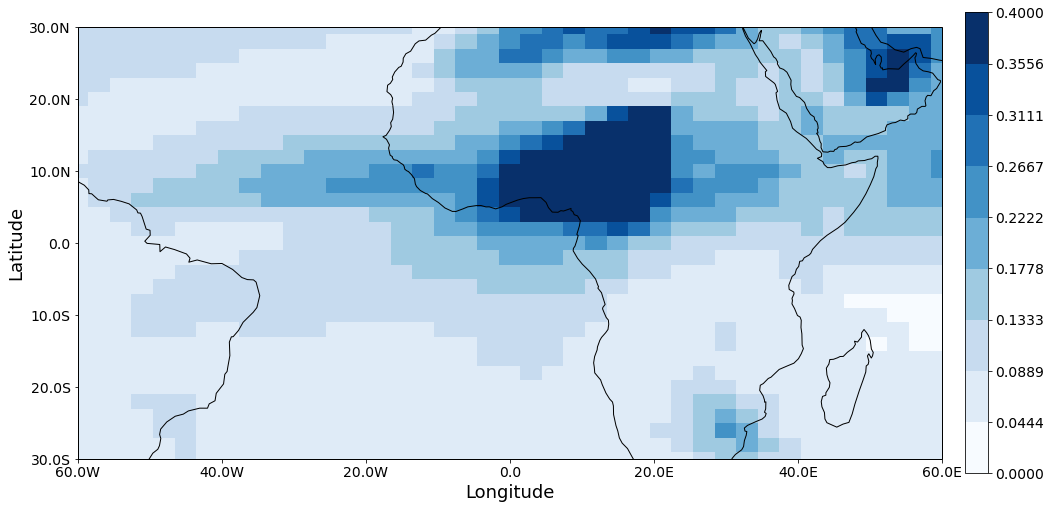

In [18]:
pya.plot.mapping.plot_griddeddata_on_map(od550aer_tm5[1], xlim=(-60, 60), ylim=(-30, 30), vmin=0, vmax=0.4, log_scale=False);

### Regional filtering

Regional filtering can be performed using the [Filter](http://aerocom.met.no/pyaerocom/api.html#module-pyaerocom.filter) class. 

#### Rectangular regions

An overview of rectangular AeroCom default regions can be accessed via:

In [19]:
print(pya.const.OLD_AEROCOM_REGIONS)

['WORLD', 'ASIA', 'AUSTRALIA', 'CHINA', 'EUROPE', 'INDIA', 'NAFRICA', 'SAFRICA', 'SAMERICA', 'NAMERICA']


Let's choose north Africa as an example. Create instance of Filter class:

In [20]:
f = pya.Filter('NAFRICA')

You can print its `region` attribute to see the edges:

In [21]:
print(f.region)

pyaeorocom Region
Name: NAFRICA
Longitude range: [-17, 50]
Latitude range: [0, 40]
Longitude range (plots): [-17, 50]
Latitude range (plots): [0, 40]


Now apply to the model data object:

In [22]:
od550aer_nafrica = f(od550aer_tm5)

Compare shapes:

In [23]:
od550aer_nafrica

pyaerocom.GriddedData
Grid data: <iris 'Cube' of atmosphere_optical_thickness_due_to_ambient_aerosol / (1) (time: 12; latitude: 22; longitude: 23)>

In [24]:
od550aer_tm5

pyaerocom.GriddedData
Grid data: <iris 'Cube' of atmosphere_optical_thickness_due_to_ambient_aerosol / (1) (time: 12; latitude: 90; longitude: 120)>

As you can see, the filtered object is reduced in the longitude and latitude dimension. Let's have a look:

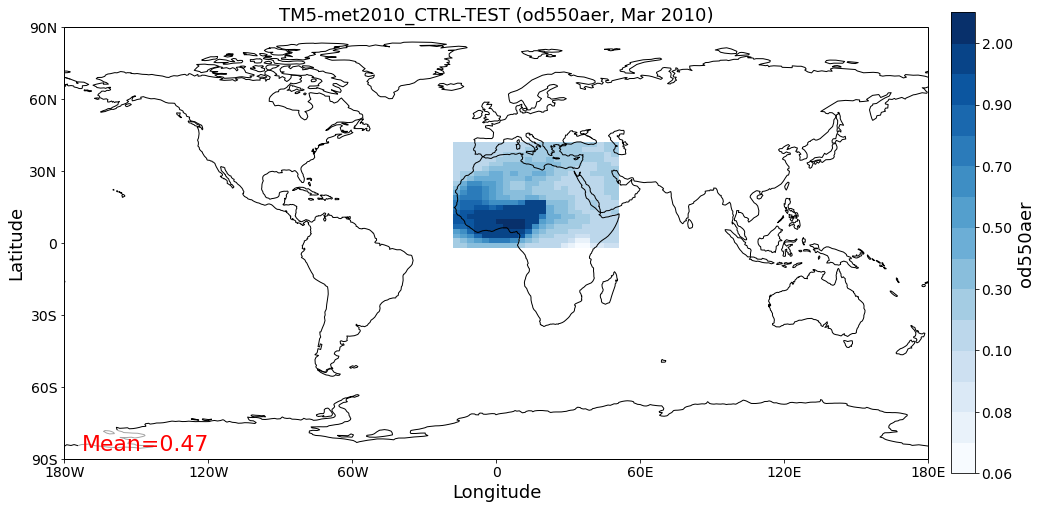

In [25]:
od550aer_nafrica.quickplot_map('March 2010');

#### Binary region masks

Available [HTAP](http://www.htap.org/) binary filter masks can be accessed via:

In [26]:
print(pya.const.HTAP_REGIONS)

['PAN', 'EAS', 'NAF', 'MDE', 'LAND', 'SAS', 'SPO', 'OCN', 'SEA', 'RBU', 'EEUROPE', 'NAM', 'WEUROPE', 'SAF', 'USA', 'SAM', 'EUR', 'NPO', 'MCA']


And they are handled in the same way as the rectangular regions:

Failed to compute / add area weighted mean. Reason: ValueError('Format specifier missing precision')


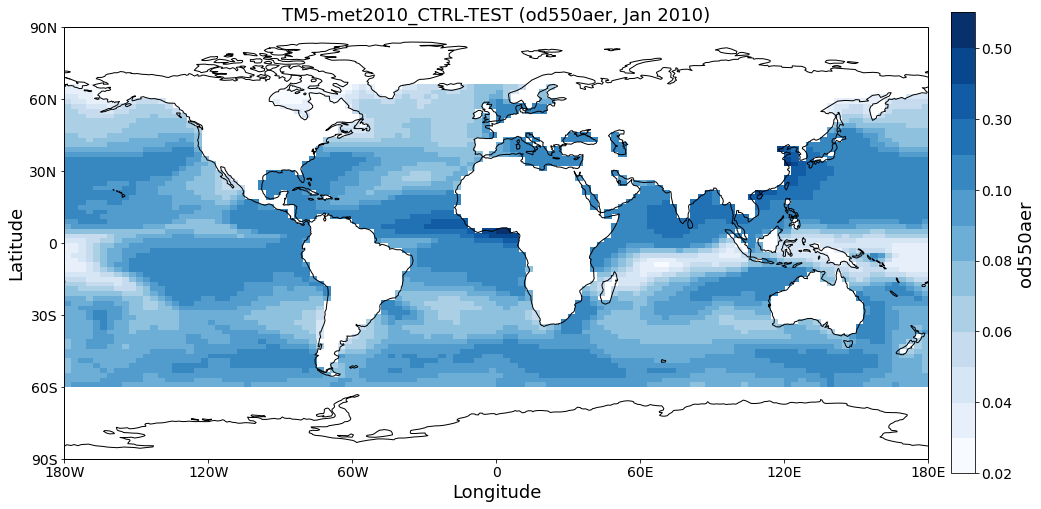

In [27]:
pya.Filter('OCN')(od550aer_tm5).quickplot_map();

As you can see the provided HTAP region masks are only valid within 60$^\circ$S to 60$^\circ$N.

#### Filtering of time

Filtering of time is not included in the Filter class (which only allows for regional filtering) but can be easily performed from the `GriddedData` object directly. If you know the indices of the time stamps you want to crop, you can simply use numpy indexing syntax (remember that we have a 3D array containing time, latitude and lonfgitude). 

Let's say we are interested in the (northern hemispheric) summer months of June to September.

Since the time dimension corresponds the first index in the 3D data (time, lat, lon), and since we know, that we have monthly 2010 data (see above), we may use:

In [28]:
od550aer_summer = od550aer_tm5[5:8]
od550aer_summer.time_stamps()

array(['2010-06-15T00:00:00.000000', '2010-07-15T12:00:00.000000',
       '2010-08-15T12:00:00.000000'], dtype='datetime64[us]')

However, this methodology might not always be handy (imagine you have a 10 year dataset of `3hourly` sampled data and want to extract three months in the 6th year ...). In that case, you can perform the cropping using the actual timestamps:

In [29]:
od550aer_tm5.crop(time_range=('6-2010', '9-2010')).time_stamps()

array(['2010-06-15T00:00:00.000000', '2010-07-15T12:00:00.000000',
       '2010-08-15T12:00:00.000000'], dtype='datetime64[us]')

#### Data selection over multiple dimensions 

Inspired by the [xarray.DataArray.sel](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.sel.html) method, a similar method was implemented in `GriddedData`:

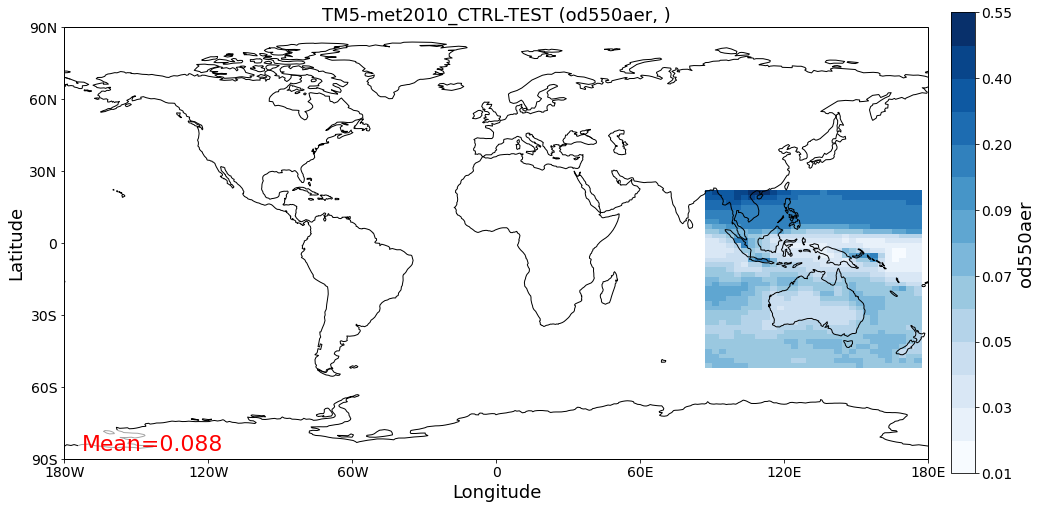

In [30]:
od550aer_tm5.sel(time='April 2010', longitude=(90, 179), latitude=(-50, 20)).quickplot_map();

**NOTE**: Before release of version 0.10.0, there was a [bug](https://github.com/metno/pyaerocom/issues/225) that led to a crash if a time range (i.e. `time=(start, stop)`) was passed into the `sel` method. 

### Data aggregation / regridding

You may regrid `GriddedData` using the `regrid` method (for regional regridding) or the `resample_time` method (for temporal resmpling). Like already done above, the calls may be combined, e.g.:

In [31]:
lowres = od550aer_tm5.regrid(lat_res_deg=10, lon_res_deg=20).resample_time('yearly')
lowres

pyaerocom.GriddedData
Grid data: <iris 'Cube' of od550aer / (1) (time: 1; latitude: 18; longitude: 18)>

As you can see, the time dimension only has one entry, as expected, as the data only contains 2010 timestamps and we computed a yearly average, lat and lon dimensions are also reduced, accordingly.

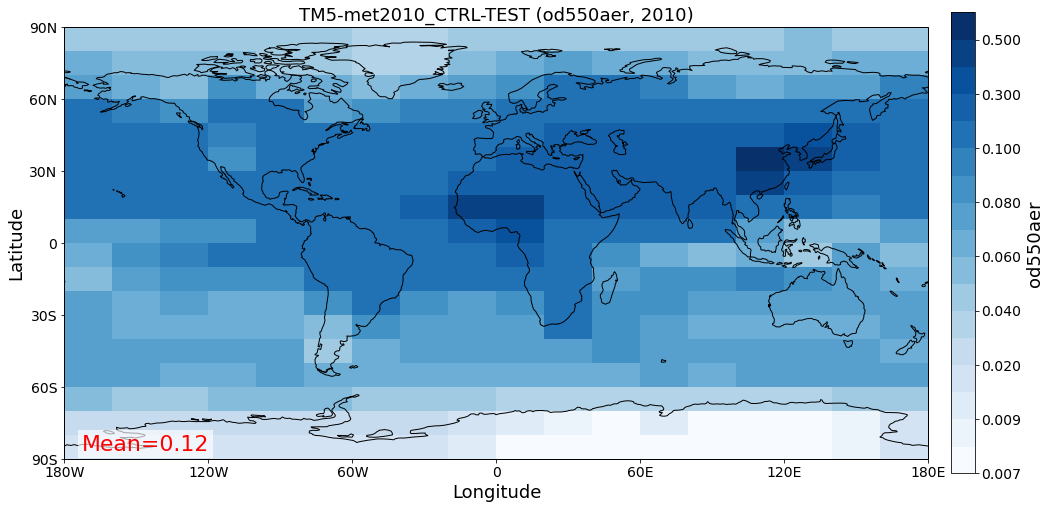

In [32]:
lowres.quickplot_map();

#### Regional averaging

The actual cell sizes of latitude and longitude coordinates vary, dependent on where you are, that is, they are largest close to the equator, and smallest near the poles. When computing a regional average, this needs to be considered (i.e. values need to be weighted by their actual cell size). This is *area weighted regridding* is implemented in the `iris` library and is used by default in `GriddedData`, for instance, when calling:

In [33]:
od550aer_tm5.mean()

0.11864813532841474

You may specify if you do not want to use area weighting:

In [34]:
od550aer_tm5.mean(areaweighted=False)

0.09825691

Makes quite a difference, doesn't it?

### Extracting time-series

Time-series at individual coordinates can be extracted from a `GriddedData` object via:

In [35]:
ts_data = od550aer_tm5.to_time_series(latitude=60, longitude=11)
ts_data

[StationData([('dtime', []),
              ('var_info', BrowseDict([('od550aer', {'units': Unit('1')})])),
              ('station_coords',
               {'latitude': None, 'longitude': None, 'altitude': None}),
              ('data_err', BrowseDict()),
              ('overlap', BrowseDict()),
              ('numobs', BrowseDict()),
              ('data_flagged', BrowseDict()),
              ('filename', None),
              ('station_id', None),
              ('station_name', None),
              ('instrument_name', None),
              ('PI', None),
              ('country', None),
              ('country_code', None),
              ('ts_type', 'monthly'),
              ('latitude', 61.0),
              ('longitude', 10.5),
              ('altitude', nan),
              ('data_id', 'TM5-met2010_CTRL-TEST'),
              ('dataset_name', None),
              ('data_product', None),
              ('data_version', None),
              ('data_level', None),
              ('revision_dat

As you can see from the output, the return value of this method is a list, that contains *one* `pyaerocom.StationData` object. The reason why this method returns a list is because it is usually called with many input coordinates (e.g. all site locations of an observation network), and thus, returns a list of `StationData` objects, one for each input coordinate. 

The `StationData` object is basically a dictionary-like object with some extra functionality.

In [36]:
station = ts_data[0]

The actual time-series is a `pandas.Series` object and can be accessed through the variable name (remember, `GriddedData` instances are single variable).

In [37]:
ts = station['od550aer']
ts

2010-01-15 12:00:00    0.049607
2010-02-14 00:00:00    0.061162
2010-03-15 12:00:00    0.069986
2010-04-15 00:00:00    0.097556
2010-05-15 12:00:00    0.103770
2010-06-15 00:00:00    0.107482
2010-07-15 12:00:00    0.146354
2010-08-15 12:00:00    0.145518
2010-09-15 00:00:00    0.078066
2010-10-15 12:00:00    0.077722
2010-11-15 00:00:00    0.037447
2010-12-15 12:00:00    0.039024
dtype: float32

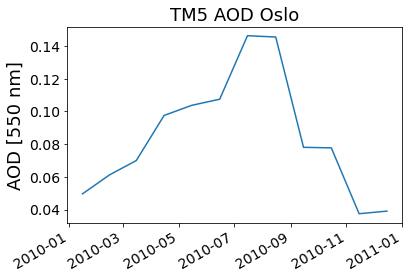

In [38]:
ax = ts.plot()
ax.set_title('TM5 AOD Oslo')
ax.set_ylabel('AOD [550 nm]');

This is as much as there is to say for now about `GriddedData` and `StationData` for now. Let's have a little closer look at observations. After all, the main purpose of the AeroCom initiative is to compare models with observations. As we shall see below, the just introduced `StationData` object will play a key role when bringing *gridded* model data (`GriddedData`) together with *ungridded*  observational data, such as measurements of a certain variable at a given site location.

In the following section the reading of ungridded data is illustrated based on the example of AERONET version 3 (level 2) data.

## Observational data: Reading of and working with ungridded data

This section provides brief introductions into the following pyaerocom classes and architectures:

- [`pya.io.ReadUngridded`](https://pyaerocom.met.no/api.html#pyaerocom.io.readungridded.ReadUngridded)
- [`pya.UngriddedData`](https://pyaerocom.met.no/api.html#pyaerocom.ungriddeddata.UngriddedData)
- [`pya.StationData`](https://pyaerocom.met.no/api.html#pyaerocom.stationdata.StationData)

### Primer on observational data

Other than model data, which can be provided as a gridded object over a certain domain (e.g. latitude, longitude, time) and in that, can be considered **fully sampled**, observational data is usually **sparsely** sampled in space and time.

That is, consider a network of observations of a certain variable (e.g. od550aer, or AOD), with many different site locations around the globe. Each of these sites is measuring the variable at that exact location, and the whole network of sites makes a point cloud of site locations in the latitude, longitude domain. In addition, since these are real world measurements, the temporal sampling itself between the different sites is not synchronised, that is, each site is measuring independently of any other site. 

For instance, the [AERONET](https://aeronet.gsfc.nasa.gov/) network is a global network of sun photometer measurements, that can measure the AOD at several wavelengths based on measurements of the solar irradiance. Thus, at the least, these measurements require 2 things:

1. Daylight
2. A clear sky

Thus, it is needless to say, that a site in Antarctica cannot measure at the same time as a site in Ny-Ålesund (actually, that is also not strictly true, as AERONET now also provides AOD measurements based on the lunar irradiance, but I hope you got the point anyways). 

This should illustrate, that it is more difficult to define a *harmonised* and yet, flexible data format for such observational databases. In pyaerocom, the `UngriddedData` object is designed for such point cloud data and typically holds the data belonging to a whole observation network, that is:

**The `UngriddedData` object can be considered a *point-cloud-like* dataobject that holds individual time-series from many locations around the globe and the associated metadata for each site and measurement**

Moreover, since observational data typically comes from many different observation networks, the formats in which these data are stored typically vary from network to network, which makes it harder to read the data, compared to model data which typically comes as NetCDF file and these days, most often follow some metadata conventions such as the [CF conventions](https://cfconventions.org/).

Data from the AERONET network (that is introduced in the following), for instance, is provided in the form of column seperated text files per measurement station, where columns correspond to different variables and data rows to individual time stamps. 

As a result, custom reading routines for individual observation networks need to be implemented, and pyaerocom provides reading support for many commonly used observational databases such as [AERONET](https://aeronet.gsfc.nasa.gov/), or the [EBAS](http://ebas.nilu.no/) or [EARLINET](https://earlinet.org) data.

The basic workflow for reading of ungridded data, such as Aeronet data, is very similar to the reading of gridded data (comprising a reading class that handles a query and returns a data class, here [UngriddedData](http://aerocom.met.no/pyaerocom/api.html#module-pyaerocom.ungriddeddata). However, under the hood, the implementation is a little more complicated, as there are reading classes for each supported network, as illustrated in the following flowchart:

![Flowchart ungridded reading](suppl/pyaerocom_ungridded_io_flowchart.png)

The actual classes handling the reading of data (for a given dataset) are indicated in blue. The orange `ReadUngridded` class is a factory class, that knows about the blue reading classes via a unique ID (similar to the gridded reading). Thus, as indicated, as a user, you do not need to know which exact reading class you need, you just need the ID and `ReadUngridded` will know which (blue) reader to use. To summarise, what you need for reading an ungridded dataset is:

1. A path where the actual datafiles are located
2. An unique ID, that links that path with a name
3. A reader that can read the class

The first 2 points are available via:

In [39]:
pya.const.OBSLOCS_UNGRIDDED

OrderedDict([('AeronetSunV3L2Subset.daily',
              '/home/jonasg/MyPyaerocom/testdata-minimal/obsdata/AeronetSunV3Lev2.daily/renamed'),
             ('AeronetSDAV3L2Subset.daily',
              '/home/jonasg/MyPyaerocom/testdata-minimal/obsdata/AeronetSDAV3Lev2.daily/renamed'),
             ('AeronetInvV3L2Subset.daily',
              '/home/jonasg/MyPyaerocom/testdata-minimal/obsdata/AeronetInvV3Lev2.daily/renamed'),
             ('EBASSubset',
              '/home/jonasg/MyPyaerocom/testdata-minimal/obsdata/EBASMultiColumn')])

And the reader classes that are supposed to be used for each of these IDs is provided in the `ReadUngridded` class header:

In [40]:
pya.io.ReadUngridded.SUPPORTED_READERS

[pyaerocom.io.read_aeronet_invv3.ReadAeronetInvV3,
 pyaerocom.io.read_aeronet_invv2.ReadAeronetInvV2,
 pyaerocom.io.read_aeronet_sdav2.ReadAeronetSdaV2,
 pyaerocom.io.read_aeronet_sdav3.ReadAeronetSdaV3,
 pyaerocom.io.read_aeronet_sunv2.ReadAeronetSunV2,
 pyaerocom.io.read_aeronet_sunv3.ReadAeronetSunV3,
 pyaerocom.io.read_earlinet.ReadEarlinet,
 pyaerocom.io.read_ebas.ReadEbas,
 pyaerocom.io.read_gaw.ReadGAW,
 pyaerocom.io.read_aasetal.ReadAasEtal,
 pyaerocom.io.read_ghost.ReadGhost]

The link between ID (keys of `const.OBSLOCS_UNGRIDDED`) and reader is available in the actual readers themselves, e.g.:

In [41]:
pya.io.read_aeronet_sunv3.ReadAeronetSunV3.SUPPORTED_DATASETS

['AeronetSunV3Lev1.5.daily',
 'AeronetSunV3Lev1.5.AP',
 'AeronetSunV3Lev2.daily',
 'AeronetSunV3Lev2.AP',
 'AeronetSunV3L2Subset.daily']

But these are details that you usually do not need to worry about. If you want to register a new observation dataset, you need the 3 points specified above and can add it via:

In [42]:
aeronet_sun_datadir = f'{pya.const.OUTPUTDIR}/testdata-minimal/obsdata/AeronetSunV3Lev2.daily/renamed'
pya.const.add_ungridded_obs(obs_id='Bla', 
                            data_dir=aeronet_sun_datadir,
                            reader=pya.io.read_aeronet_sunv3.ReadAeronetSunV3)

Now, we basically have 2 names for the same dataset:

In [43]:
pya.io.read_aeronet_sunv3.ReadAeronetSunV3.SUPPORTED_DATASETS

['AeronetSunV3Lev1.5.daily',
 'AeronetSunV3Lev1.5.AP',
 'AeronetSunV3Lev2.daily',
 'AeronetSunV3Lev2.AP',
 'AeronetSunV3L2Subset.daily',
 'Bla']

That is, the data under the above directory is now accessible via 2 IDs: `Bla` and `AeronetSunV3L2Subset.daily`.

Before continuing with the reading of observational data, some things need to be said related to the caching of `UngriddedData` objects. 

### Caching of UngriddedData

Reading of ungridded data is often rather time-consuming. Therefore, pyaerocom uses a caching strategy that stores loaded instances of the `UngriddedData` class as pickle files in a cache directory (illustrated in the flowchart shown above). The loaction of the cache directory can be accessed via:

In [44]:
pya.const.CACHEDIR

'/home/jonasg/MyPyaerocom/_cache/jonasg'

You may change this directory if required.

In [45]:
f'Caching is active? {pya.const.CACHING}'

'Caching is active? True'

##### Deactivate / Activate caching

In [46]:
pya.const.CACHING = False

In [47]:
pya.const.CACHING = True

**Note**: if caching is active, make sure you have enough disk quota or change location where the cache files are stored.

### Read Aeronet Sun v3 level 2 data

As illustrated in the flowchart above,  ungridded observation data can be imported using the `ReadUngridded` class. Like for the model data, observation datasets can be searched as follows:

In [48]:
pya.browse_database('Aeronet*');


Dataset name: AeronetSunV3L2Subset.daily
Data directory: /home/jonasg/MyPyaerocom/testdata-minimal/obsdata/AeronetSunV3Lev2.daily/renamed
Supported variables: ['od340aer', 'od440aer', 'od500aer', 'od870aer', 'ang4487aer', 'ang44&87aer', 'od550aer']
Last revision: n/d

Dataset name: AeronetSDAV3L2Subset.daily
Data directory: /home/jonasg/MyPyaerocom/testdata-minimal/obsdata/AeronetSDAV3Lev2.daily/renamed
Supported variables: ['od500gt1aer', 'od500lt1aer', 'od500aer', 'ang4487aer', 'od550aer', 'od550gt1aer', 'od550lt1aer']
Last revision: n/d

Dataset name: AeronetInvV3L2Subset.daily
Data directory: /home/jonasg/MyPyaerocom/testdata-minimal/obsdata/AeronetInvV3Lev2.daily/renamed
Supported variables: ['abs440aer', 'angabs4487aer', 'od440aer', 'ang4487aer', 'abs550aer', 'od550aer']
Last revision: n/d


The search routine found 3 matches for the 3 different AERONET data products: Sun, SDA, and Inv (inversion). You may read more about the different products at the [AERONET website](https://aeronet.gsfc.nasa.gov/).

Let's continue with the "Sun" product (AERONET Direct Sun algorithm). As you can see from the output above, this dataset contains daily averages, which is convenient to use for model evaluation. 

In [49]:
obs_id = 'AeronetSunV3L2Subset.daily'

In [50]:
obs_reader = pya.io.ReadUngridded(obs_id)
print(obs_reader)


Dataset name: AeronetSunV3L2Subset.daily
Data directory: /home/jonasg/MyPyaerocom/testdata-minimal/obsdata/AeronetSunV3Lev2.daily/renamed
Supported variables: ['od340aer', 'od440aer', 'od500aer', 'od870aer', 'ang4487aer', 'ang44&87aer', 'od550aer']
Last revision: n/d


Let's read the data (you can read a single or multiple variables at the same time). For now, we only read the AOD at 550 nm:

In [51]:
od550aer_aeronet = obs_reader.read(vars_to_retrieve='od550aer')
od550aer_aeronet

UngriddedData <networks: ['AeronetSunV3L2Subset.daily']; vars: ['od550aer']; instruments: ['sun_photometer'];No. of metadata units: 22

As you can see, the data object is of type `UngriddedData`. Other than `GriddedData`, `UngriddedData` can hold an arbitrary number of variables, and even networks. The number of metadata units indicates the number of data files that have been read.

### Plot all station coordinates

To get an overview, you can plot all site coordinates contained in the dataset. You can also plot multiple times into the same map with different input criteria. For instance, below we first plot all site locations available in the data (in red), and then, on top of it, in green, we plot sites that contain data in 2010.

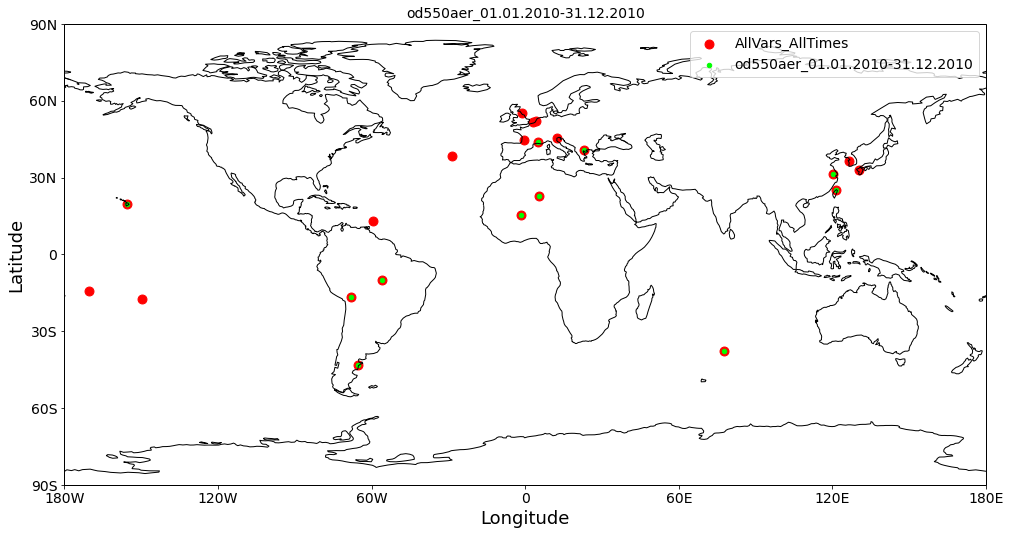

In [52]:
ax = od550aer_aeronet.plot_station_coordinates(markersize=80)
od550aer_aeronet.plot_station_coordinates(color='lime', var_name='od550aer', start=2010, stop=2011, markersize=20, ax=ax)

#### Access of individual stations

For intercomparison with model data, we are interested in time-series from individual sites. You can check out all existing site-location names via:

In [53]:
od550aer_aeronet.unique_station_names

['AAOT',
 'ARIAKE_TOWER',
 'Agoufou',
 'Alta_Floresta',
 'American_Samoa',
 'Amsterdam_Island',
 'Anmyon',
 'Avignon',
 'Azores',
 'BORDEAUX',
 'Barbados',
 'Blyth_NOAH',
 'La_Paz',
 'Mauna_Loa',
 'Tahiti',
 'Taihu',
 'Taipei_CWB',
 'Tamanrasset_INM',
 'The_Hague',
 'Thessaloniki',
 'Thornton_C-power',
 'Trelew']

To access individual site location data as `StationData` you can simply do:

In [54]:
station_data = od550aer_aeronet['La_Paz'] # this is fully equivalent with aeronet_data.to_station_data('Leipzig')
station_data

StationData([('dtime',
              array(['2006-02-18T00:00:00.000000000', '2006-02-19T00:00:00.000000000',
                     '2006-02-20T00:00:00.000000000', ...,
                     '2019-05-24T00:00:00.000000000', '2019-05-25T00:00:00.000000000',
                     '2019-05-26T00:00:00.000000000'], dtype='datetime64[ns]')),
             ('var_info',
              BrowseDict([('od550aer',
                           OrderedDict([('units', '1'),
                                        ('overlap', False),
                                        ('ts_type', 'daily'),
                                        ('apply_constraints', False),
                                        ('min_num_obs', None),
                                        ('how', 'mean')]))])),
             ('station_coords',
              {'latitude': -16.538999999999998,
               'longitude': -68.066467,
               'altitude': 3439.0}),
             ('data_err', BrowseDict()),
             ('overlap', B

As you can see, the returned object is of type `StationData` which has been introduced above (remember, we extracted a time series from the TM5 model for the location of Oslo).

As mentioned above, it can be used like a dictionary, and the variable time-series can be accessed via:

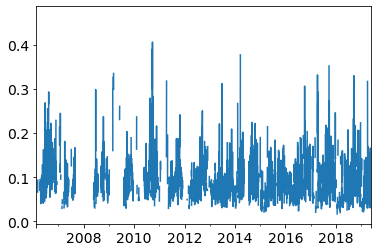

In [55]:
station_data['od550aer'].plot()

You may also plot directly from the `StationData` object (and do some more other hopefully self-explanatory things):

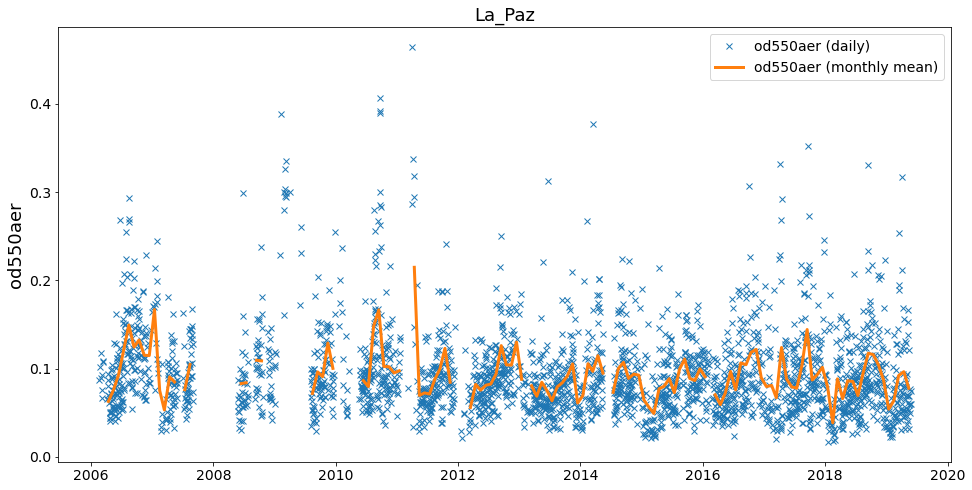

In [56]:
ax = station_data.plot_timeseries('od550aer', marker='x', ls='none')
station_data.plot_timeseries('od550aer', freq='monthly', marker=' ', ls='-', lw=3, ax=ax)

Back to `UngriddedData`: You may also retrieve the `StationData` with specifying more constraints using `to_station_data` (e.g. in monthly resolution and only for the year 2010). And you can overlay different curves, by passing the axes instance returned by the plotting method:

In [57]:
ax=aeronet_data.to_station_data('La_Paz', 
                                start=2010, stop=2011,
                                freq='daily').plot_timeseries('od550aer')

ax=aeronet_data.to_station_data('La_Paz', 
                                start=2010, 
                                freq='monthly').plot_timeseries('od550aer', ax=ax)
ax.legend()
ax.set_title('La Paz AODs 2010');

NameError: name 'aeronet_data' is not defined

#### You can also plot the time-series directly from `UngriddedData`

In [ ]:
aeronet_data.plot_station_timeseries('La_Paz', 'od550aer', ts_type='monthly',
                                     start=2018).set_title('Monthly AOD in La Paz, 2018');

## Colocation of model and obsdata

Now that we have a **gridded model dataset** and an **ungridded observation dataset** loaded we can continue with colocation of both datasets. *Colocation* essentially describes the process of matching observations and model in space and time, which makes it possible to compare both and ultimately, to assess how well the model is performing. 

As the observations are usually sparse, they define the set of locations and times to be extracted from the model (for comparison). Essentially, what needs to be done is simple:

1. Decide on a time interval in which you want to colocate the observations with the model data.
2. Decide on an output frequency.
3. Find all site location coordinates from the observations in the time period and extract the model values from the model dataset at these locations.
4. Match the time interval and frequency. 

pyaerocom has some methods that can do this for you and these methods return an instance of the [`ColocatedData`](https://pyaerocom.met.no/api.html#pyaerocom.colocateddata.ColocatedData) object.

#### Low-level colocation routine(s)

Let's colocate the TM5 model data with the AERONET AOD subset for the year 2010 and in monthly resolution. Since we already have both data objects loaded, we can go straight to the low-level colocation routine:

In [ ]:
coldata = pya.colocation.colocate_gridded_ungridded(od550aer_tm5, 
                                                    od550aer_aeronet, 
                                                    ts_type='monthly',
                                                    start=2010,
                                                    filter_name='WORLD-noMOUNTAINS')

The filter-name `WORLD-noMOUNTAINS` denotes that all available AERONET sites are supposed to be used but high altitude sites (located above 1000m a.s.l). A more detailed introduction into available regions and region filters is provided in the [getting_started_setup.ipynb](https://github.com/metno/pyaerocom-tutorials/blob/master/getting_started_setup.ipynb) tutorial.

You may create a scatter plot from these colocated monthly means, which includes relevant statistical parameters that help to assess model performance:

In [ ]:
coldata.plot_scatter(loglog=True);

Does not look too bad, you can see that this result is from 8 sites and 62 data points (monthly averages). The normalised-mean-bias (NMB) is -12.9%, which means that the model slightly underestimates AOD at these locations. 

A more illustrative view of the model biases can be retrieved by plotting a *bias map*:

In [ ]:
pya.plot.mapping.plot_nmb_map_colocateddata(coldata);

The fact that you can barely see most of the sites is a good sign, since 0% bias is mapped to white color which is the same as the background color here. The largest bias is found in Amsterdam Island, in the southern Indian Ocean, which could be an indication that the model is simulating too little sea-salt aerosol in this very remote and clean region.

#### Under the hood ...

... the `ColocatedData` object is an `xarray.DataArray`:

In [ ]:
coldata.data

As you can see, model and obs (stored in `data_source` dimension) now share the same coordinates (dimension `station_name`) and time stamps (dimension `time`). The `data_source` dimension always contains the observation data at the first index and the model data at the second:

In [ ]:
obsdata = coldata.data[0]
obsdata

In [ ]:
modeldata = coldata.data[1]
modeldata

#### High-level colocation routine

If it wasn't for the purpose of this notebook, normally, we don't want to go through the hassle of reading the data individually before colocating. Thus, pyaerocom has a high-level interface that can do colocation straight with the observation and model IDs (under the hood, of course, it uses the same routines that have been used here). By default, this high-level interface also stores all produced `ColocatedData` objects as NetCDF files, for later analysis:

In [74]:
colocator = pya.Colocator(
    model_id=model_id, obs_id=obs_id, obs_vars='od550aer',
    ts_type='monthly', 
    model_ts_type_read='monthly',
    filter_name='OCN', #  let's try to better isolate Amsterdam Island
    reanalyse_existing=True, 
    save_coldata=True)

colocator

Colocator([('save_coldata', True),
           ('_obs_cache_only', False),
           ('obs_vars', ['od550aer']),
           ('obs_vert_type', None),
           ('model_vert_type_alt', None),
           ('read_opts_ungridded', None),
           ('obs_ts_type_read', None),
           ('model_use_vars', None),
           ('model_add_vars', None),
           ('model_keep_outliers', True),
           ('model_to_stp', False),
           ('model_id', 'TM5-met2010_CTRL-TEST'),
           ('model_name', None),
           ('model_data_dir', None),
           ('obs_id', 'AeronetSunV3L2Subset.daily'),
           ('obs_name', None),
           ('obs_data_dir', None),
           ('obs_keep_outliers', False),
           ('obs_use_climatology', False),
           ('obs_add_meta', []),
           ('gridded_reader_id',
            {'model': 'ReadGridded', 'obs': 'ReadGridded'}),
           ('start', None),
           ('stop', None),
           ('ts_type', 'monthly'),
           ('filter_name', 'OCN'),
 

Quite a few options, a lot of them are for the even higher-level automatic web-processing tools that feed the [Aerocom Evaluation websites](https://aerocom-evaluation.met.no/main.php?project=aerocom&exp=PIII-optics2019-P), so let's not get lost in these details here.

The colocation can be run as follows:

In [75]:
colocator.run()

PREPARING colocation of TM5-met2010_CTRL-TEST vs. AeronetSunV3L2Subset.daily
The following variable combinations will be colocated
MODEL-VAR	OBS-VAR
od550aer	od550aer
Running TM5-met2010_CTRL-TEST / AeronetSunV3L2Subset.daily (od550aer, od550aer)
Input filters {'latitude': [-89.0, 89.0], 'longitude': [-181.5, 175.5]} result in unchanged data object
WRITE: od550aer_REF-AeronetSunV3L2Subset.daily_MOD-TM5-met2010_CTRL-TEST_20100101_20101231_monthly_OCN.nc



As you can see in the last line of the output, the colocated data object was stored as NetCDF file. The default direcory for these files can be accessed (and modified) in the `const` class:

In [76]:
pya.const.COLOCATEDDATADIR

'/home/jonasg/MyPyaerocom/colocated_data'

In [77]:
import os
os.listdir(pya.const.COLOCATEDDATADIR)

['logfiles',
 'CAM5.3-Oslo_AP3-CTRL2016-PD',
 'TM5-met2010_CTRL-TEST',
 'NorESM2-met2010_AP3-CTRL']

And you can see that there is a subdirecory which contains all colocated data objects that have been created for the TM5 model. The loaded colocated data object can also be accessed via:

In [78]:
coldata2 = colocator.data[model_id]['od550aer']

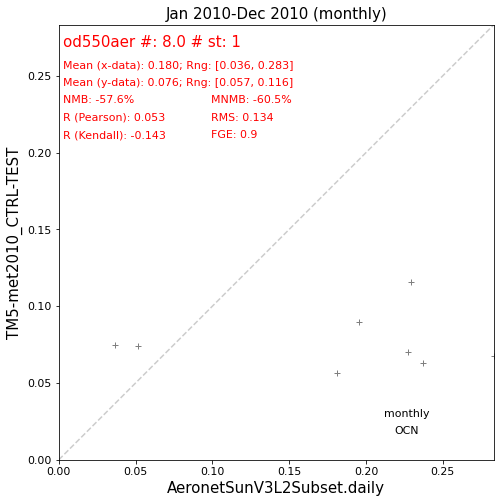

In [79]:
coldata2.plot_scatter();

That looks like we managed to get only Amsterdam Island here (1 site) and 8 months of data. The corresponding model bias suggests that TM5 is underestimating AOD at 550nm at Amsterdam Island by ca 60%. 

As a last step for this tutorial, let's make sure it is Amsterdam Island that we got here:

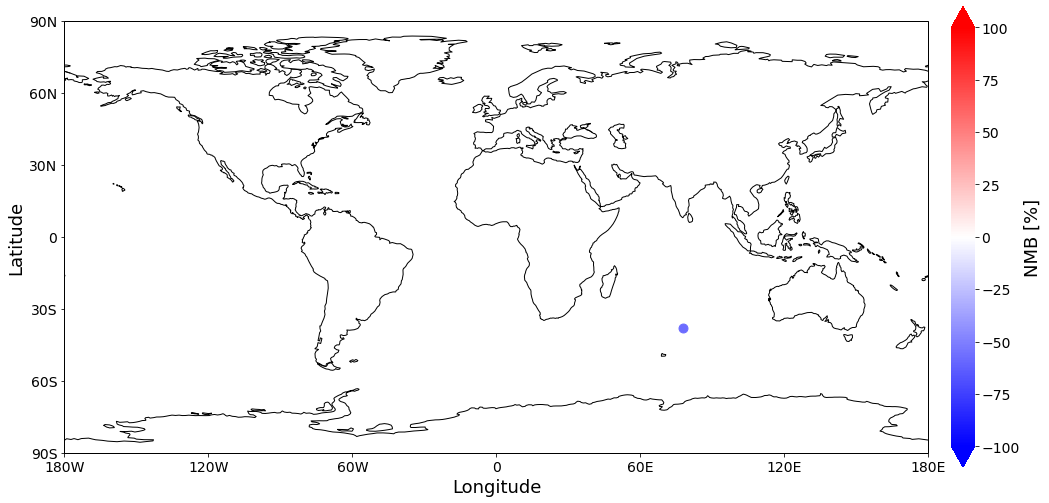

In [82]:
pya.plot.mapping.plot_nmb_map_colocateddata(coldata2);

Looks like it! Ciao!